In [ ]:
import torch
import torch.nn as nn #contains different classess that help you build neural network models. like activation fun forward
import torch.nn.functional as F #used for convolution
import torchvision #for datasets
import torchvision.transforms as transforms #used for image transforms to tensor
import matplotlib.pyplot as plt #to plot
import numpy as np
from torch.utils.data import Dataset,DataLoader

# New Section

In [ ]:
!unrar e '/content/drive/MyDrive/Doodle dataset.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Doodle dataset.rar


Would you like to replace the existing file full_numpy_bitmap_airplane.npy
118872512 bytes, modified on 2021-10-02 00:03
with a new one
118872512 bytes, modified on 2021-10-02 00:03

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Y

Extracting  full_numpy_bitmap_airplane.npy                                 0%  1%  2%  3%  4%  5%  OK 

Would you like to replace the existing file full_numpy_bitmap_ant.npy
97695888 bytes, modified on 2021-10-02 00:03
with a new one
97695888 bytes, modified on 2021-10-02 00:03

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Y

Extracting  full_numpy_bitmap_ant.npy                                      5%  6%Y
  7%  8%  9%  OK 

Would you like to replace the existing file full_numpy_bitmap_banana.npy
241421904 bytes, modified on 2021-10-02 00:04
with a new one
241421904 bytes, mod

In [ ]:

D1=np.load("/content/full_numpy_bitmap_airplane.npy")

l1=np.full((151623,1),0)
D2=np.load("/content/full_numpy_bitmap_ant.npy")

l2=np.full((124612,1),1)
D3=np.load("/content/full_numpy_bitmap_banana.npy")

l3=np.full((307936,1),2)
D4=np.load("/content/full_numpy_bitmap_baseball.npy")

l4=np.full((135375,1),3)
D5=np.load("/content/full_numpy_bitmap_bird.npy")

l5=np.full((133572,1),4)
D6=np.load("/content/full_numpy_bitmap_bucket.npy")

l6=np.full((124064,1),5)
D7=np.load("/content/full_numpy_bitmap_butterfly.npy")

l7=np.full((117999,1),6)
D8=np.load("/content/full_numpy_bitmap_cat.npy")

l8=np.full((123202,1),7)
D9=np.load("/content/full_numpy_bitmap_coffee cup.npy")

l9=np.full((183432,1),8)
D10=np.load("/content/full_numpy_bitmap_dolphin.npy")

l10=np.full((121613,1),9)
D11=np.load("/content/full_numpy_bitmap_donut.npy")

l11=np.full((140751,1),10)
D12=np.load("/content/full_numpy_bitmap_duck.npy")

l12=np.full((135480,1),11)
D13=np.load("/content/full_numpy_bitmap_fish.npy")

l13=np.full((134150,1),12)
D14=np.load("/content/full_numpy_bitmap_leaf.npy")

l14=np.full((125571,1),13)
D15=np.load("/content/full_numpy_bitmap_mountain.npy")

l15=np.full((128540,1),14)
D16=np.load("/content/full_numpy_bitmap_pencil.npy")
l16=np.full((122001,1),15)
D17=np.load("/content/full_numpy_bitmap_smiley face.npy")
l17=np.full((124386,1),16)
D18=np.load("/content/full_numpy_bitmap_snake.npy")
l18=np.full((122273,1),17)
D19=np.load("/content/full_numpy_bitmap_umbrella.npy")
l19=np.full((124084,1),18)
D20=np.load("/content/full_numpy_bitmap_wine bottle.npy")
l20=np.full((126373,1),19)




In [ ]:
data_total=np.concatenate((D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20),axis=0)
label_total=np.concatenate((l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,l16,l17,l18,l19,l20),axis=0)
print(data_total.shape)
print(label_total.shape)
a=np.arange(0,2807037)
np.random.shuffle(a)
data_total=data_total[a,:]
label_total=label_total[a,:]





(2807037, 784)
(2807037, 1)


In [ ]:
batch_size=5113
total_batches=549
#data_total=torch.from_numpy(data_total)
#label_total=torch.from_numpy(label_total)

class Data_train(Dataset):
  def __init__(self):
    self.x= data_total[:2045200,:].reshape(2045200,1,28,28)
    self.y= label_total[:2045200,:].reshape(2045200,)
    self.n= data_total[:2045200,:].shape[0]
  def __getitem__(self,i):
    return self.x[i],self.y[i]
  def __len__(self):
    return self.n
data_train=Data_train()
dataloader_train=DataLoader(data_train,batch_size=5113,shuffle=True)

class Data_test(Dataset):
  def __init__(self):
    self.x= data_total[2045200:,:].reshape(2807037-2045200,1,28,28)
    self.y= label_total[2045200:,:].reshape(2807037-2045200,)
    self.n= data_total[2045200:,:].shape[0]
  def __getitem__(self,i):
    return self.x[i],self.y[i]
  def __len__(self):
    return self.n
data_test=Data_test()
dataloader_test=DataLoader(data_test,batch_size=5113,shuffle=True)










In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
learning_rate=0.015

class ConvNet(nn.Module): #class for making forward prob
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1=nn.Conv2d(1,6,5)# input(channels) ,output, kernal sizes
    self.pool= nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*4*4,120)#16*4*4 do conv1,2 and pool to get the last layer length
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,20)

    
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1,16*4*4)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x
    



model=ConvNet().to(device)

criterion=nn.CrossEntropyLoss() #computes loss

optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
#Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses
#training loop
train_losses = []
train_counter = []
test_losses = []
num_epochs=75
for epoch in range(num_epochs):#will loop over epochs
  for i,(images,labels) in enumerate(dataloader_train): #enumerate loops over the given data and gives labels i mean changes them after every iter
    images=images.to(device)
    labels=labels.to(device)
    #forward
    outputs=model(images.float())
    loss=criterion(outputs,labels)
    if i==300: 
      train_losses.append(loss.item())

    #backward
    optimizer.zero_grad()#empty grad
    loss.backward()#does backprop
    optimizer.step()#upates the parameters for us
    if i==300:
      print(f'Train Epoch: {epoch+1}/{num_epochs}, loss ={loss.item():.4f}')



Train Epoch: 1/75, loss =0.9995
Train Epoch: 2/75, loss =0.7833
Train Epoch: 3/75, loss =0.7133
Train Epoch: 4/75, loss =0.6696
Train Epoch: 5/75, loss =0.6060
Train Epoch: 6/75, loss =0.6045
Train Epoch: 7/75, loss =0.5457
Train Epoch: 8/75, loss =0.4935
Train Epoch: 9/75, loss =0.5143
Train Epoch: 10/75, loss =0.5159
Train Epoch: 11/75, loss =0.5086
Train Epoch: 12/75, loss =0.4829
Train Epoch: 13/75, loss =0.4683
Train Epoch: 14/75, loss =0.4866
Train Epoch: 15/75, loss =0.4669
Train Epoch: 16/75, loss =0.4726
Train Epoch: 17/75, loss =0.4615
Train Epoch: 18/75, loss =0.4643
Train Epoch: 19/75, loss =0.4565
Train Epoch: 20/75, loss =0.4612
Train Epoch: 21/75, loss =0.3972
Train Epoch: 22/75, loss =0.4278
Train Epoch: 23/75, loss =0.4242
Train Epoch: 24/75, loss =0.4269
Train Epoch: 25/75, loss =0.4308
Train Epoch: 26/75, loss =0.4163
Train Epoch: 27/75, loss =0.3979
Train Epoch: 28/75, loss =0.3861
Train Epoch: 29/75, loss =0.3835
Train Epoch: 30/75, loss =0.4179
Train Epoch: 31/75,

In [ ]:
FILE = "model1.pth"
torch.save(model.state_dict(),FILE)

In [ ]:
def test(): 
  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in (dataloader_test):
      images=images.to(device)
      labels=labels.to(device)
      outputs = model(images.float())

      _,predictions = torch.max(outputs, 1) #torch.max function will return the value and the index and we are interested in the actual index
      n_samples += labels.shape[0]
      n_correct += (predictions == labels).sum().item()
  
    acc = 100* n_correct / n_samples
    print(f'Test accuracy = {acc:.4f}')

def train(): 
  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in (dataloader_train):
      images=images.to(device)
      labels=labels.to(device)
      outputs = model(images.float())

      _,predictions = torch.max(outputs, 1) #torch.max function will return the value and the index and we are interested in the actual index
      n_samples += labels.shape[0]
      n_correct += (predictions == labels).sum().item()
  
    acc = 100* n_correct / n_samples
    print(f'Training accuracy = {acc:.4f}')

train()
test()

Training accuracy = 88.9827
Test accuracy = 88.6560


Text(0.5, 1.0, 'Learning rate 0.03')

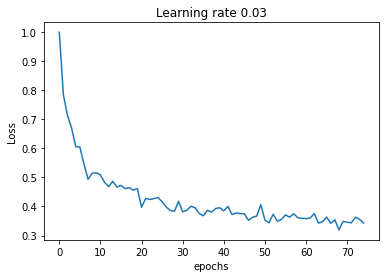

In [ ]:
plt.plot(train_losses)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Learning rate 0.03")